<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="resources/img/softbutterfly-logo.png" class="pull-left" style="display: block; height: 40px; margin: 0;"><img src="resources/img/jupyter-logo.png" class="pull-right"  style="display: block; height: 20px; margin-top: 10px;">
</div>

<center><h1>Introducción a los Autómatas Celulares<div class="divider"></div><small>Con ejemplos en Python</small></h1></center>

<center>
<b>Martín Josemaría Vuelta Rojas</b><br>
<code>martin.vuelta@softbutterfly.io</code><br/><br/>
<i>Universidad Nacional Mayor de San Marcos</i><br>
<b>Facultad de Ciencias Físicas</b><br><br>
<i>SoftButterfly</i><br>
<b>Cofundador y Líder del Área de Desarrollo</b>
</center>

<h2>1. Aplicaciones en el mundo real</h2>

<h3>1.1. Etsuko Yakushimaru - "I'm Humanity"</h3>

In [1]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/92Dcp9Fbdac?autoplay=1', width=700, height=395)

<h2>1.2. Investigaciones aplicadas</h2>

<ol>
    <li>S.C. Benjamin, N.F. Johnson, and PM Hui. Cellular automata models of traffic flow along a highway containing a junction. Journal of Physics A: Mathematical and General, 29:3119–3127, 1996.</li>

    <li>D. Burraston and E. Edmonds. Cellular automata in generative electronic music and sonic art: a historical and technical review. Digital Creativity, 16(3):165–185, 2005.</li>

    <li>D. Burraston, E. Edmonds, D. Livingstone, and E.R. Miranda. Cellular automata in midi based computer music. In Proceedings of the International Computer Music Conference, pages 71–78, 2004.</li>

    <li>A.K. Daoudia and N. Moussa. Numerical simulations of a three-lane traffic model using cellular automata. Chinese Journal of Physics, 41(6), 2003.</li>

    <li>A. Dupuis and B. Chopard. Cellular automata simulations of traffic: a model for the city of geneva. Networks and Spatial Economics, 3(1):9–21, 2003.</li>

    <li>J. Esser and M. Schreckenberg. Microscopic simulation of urban traffic based on cellular automata. International Journal of Modern Physics C: Physics and Computer, 8(5):1025–1036, 1997.</li>

    <li>C. Gershenson and D.A. Rosenblueth. Modeling self-organizing traffic lights with elementary cellular automata. arXiv:0907.1925, 2009.</li>

    <li>Z. Gürdal and B. Tatting. Cellular automata for design of truss structures with linear and nonlinear response. In 41st AIAA/ASME/ASCE/AHS/ASC Structures, Structural Dynamics and Materials Conference & Exhibit, Atlanta, US-GA, April 2000.</li>

    <li>E. Kita and T. Toyoda. Structural design using cellular automata. Structural and Multidisciplinary Optimization, 19(1):64–73, 2000.</li>

    <li>C.G. Langton. Studying artificial life with cellular automata. Physica D: Nonlinear Phenomena, 22(1-3):120–149, 1986.</li>

    <li>W. Lawrence, C.W. Chang, and P.D. Student. Motorbike’s moving behavior in mixed traffic: Particle-hopping model with cellular automata. Journal of the Eastern Asia Society for Transportation Studies, 5, 2003.</li>

    <li>Ch. Mallikarjuna and K. Ramachandra Rao. Identification of a suitable cellular automata model for mixed traffic. In Proceedings of the Eastern Asia Society for Transportation Studies, volume 6, pages 2454–2469, 2007.</li>

    <li>S. Missoum, Z. G¨urdal, and S. Setoodeh. Study of a new local update scheme for cellular automata in structural design. Structural and Multidisciplinary Optimization, 29(2):103–112, 2005.</li>

    <li>K. Nagel. Particle hopping models and traffic flow theory. Physical Review E, 53(5):4655–4672, 1996.</li>

    <li>K. Nagel and M. Schreckenberg. A cellular automaton model for freeway traffic. J. Phys. I France, 2:2221–2229, 1992.</li>

    <li>K. Nagel, D.E. Wolf, P. Wagner, and P. Simon. Two-lane traffic rules for cellular automata: A systematic approach. Physical Review E, 58(2):1425–1437, 1998.</li>
    
    <li> A. Salcido. Emerging Applications of Cellular Automata. InTech. 2013.</li>
</ol>

<h2>2. ¿Qué son los autómatas celulares?</h2>

<center><i>Son pequeños mundos regidos por sus propias leyes físicas</i></center>

<h3>2.1. Primer acercamiento a las leyes de los automatas celulares</h3>

In [2]:
from numpy.random import random
from numpy import array

length = 11
initial_state = array([round(x) for x in random(length)], dtype=int)

print(initial_state)

[0 1 0 0 1 0 0 1 1 0 0]


In [3]:
pre_init = [initial_state[-1]]
post_end = [initial_state[0]]

circular_state = pre_init + list(initial_state) + post_end

neighborhoods = array(list(circular_state[i-1:i+2] for i in range(1, len(circular_state) - 1)))

for i, (cell, neighborhood) in enumerate(zip(initial_state, neighborhoods)):
    print("{0:>2d}: [Element {1}] - [Neighborhood {2}]".format(i, cell, neighborhood))

 0: [Element 0] - [Neighborhood [0 0 1]]
 1: [Element 1] - [Neighborhood [0 1 0]]
 2: [Element 0] - [Neighborhood [1 0 0]]
 3: [Element 0] - [Neighborhood [0 0 1]]
 4: [Element 1] - [Neighborhood [0 1 0]]
 5: [Element 0] - [Neighborhood [1 0 0]]
 6: [Element 0] - [Neighborhood [0 0 1]]
 7: [Element 1] - [Neighborhood [0 1 1]]
 8: [Element 1] - [Neighborhood [1 1 0]]
 9: [Element 0] - [Neighborhood [1 0 0]]
10: [Element 0] - [Neighborhood [0 0 0]]


In [4]:
rule = {
    (0,0,0): 0, 
    (0,0,1): 1,
    (0,1,0): 1,
    (0,1,1): 1,
    (1,0,0): 1,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 0,
}

In [5]:
from numpy import zeros

length = 15
initial_state = zeros(length, dtype=int)
initial_state[length//2] = 1

history = [initial_state, ]

print("{0:>2d}: {1}".format(0, history[-1]))

for i in range(1, length//2 + 1):
    pre_init = [history[-1][-1]]
    post_end = [history[-1][0]]

    circular_state = pre_init + list(history[-1]) + post_end
    neighborhoods = array(list(circular_state[i-1:i+2] for i in range(1, len(circular_state) - 1)))
    
    history.append(
        array(list([rule[tuple(neighborhood)] for neighborhood in neighborhoods]))
    )
    
    print("{0:>2d}: {1}".format(i, history[-1]))

 0: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 1: [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 2: [0 0 0 0 0 1 1 0 0 1 0 0 0 0 0]
 3: [0 0 0 0 1 1 0 1 1 1 1 0 0 0 0]
 4: [0 0 0 1 1 0 0 1 0 0 0 1 0 0 0]
 5: [0 0 1 1 0 1 1 1 1 0 1 1 1 0 0]
 6: [0 1 1 0 0 1 0 0 0 0 1 0 0 1 0]
 7: [1 1 0 1 1 1 1 0 0 1 1 1 1 1 1]


<h3>2.2. Segundo acercamiento: Visualización gráfica</h3>

<h4>2.2.1. Ajustes para gráficos</h4>

In [6]:
%matplotlib inline

In [7]:
# Ajustes generales para los gráficos
# Para poder usar 'usetex=True' es necesario haber instalado latex
from matplotlib.font_manager import *
from matplotlib.collections import *
from matplotlib.patches import *
from matplotlib.pylab import *

import gc

ioff()

rc('lines', linewidth=1)
rc('font', family='serif')

font_title = FontProperties(size=18)
font_label = FontProperties(size=14, style='italic')
font_ticks = FontProperties(size=12)
font_legend = FontProperties(size=13)

<h4>2.2.2. Gráficos del ejemplo de la sección 2.1</h4>

<h5>2.2.2.1. La regla</h5>

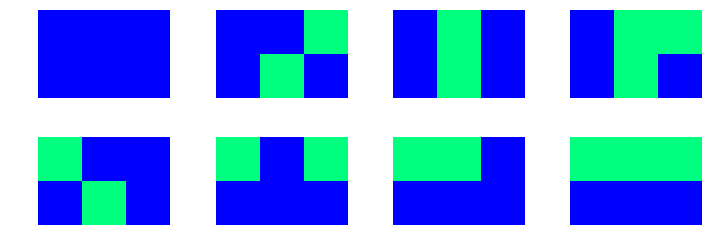

In [8]:
rule_matrix = [
    [
        [0, 0, 0],
        [0, 0, 0],
    ],
    [
        [0, 0, 1],
        [0, 1, 0],
    ],
    [
        [0, 1, 0],
        [0, 1, 0],
    ],
    [
        [0, 1, 1],
        [0, 1, 0],   
    ],
    [
        [1, 0, 0],
        [0, 1, 0],   
    ],
    [
        [1, 0, 1],
        [0, 0, 0],   
    ],
    [
        [1, 1, 0],
        [0, 0, 0],   
    ],
    [
        [1, 1, 1],
        [0, 0, 0],   
    ],
]


fig = figure(figsize=[10, 4], frameon=True)

for i, rule in enumerate(rule_matrix):
    axs = fig.add_subplot(2, 4, i+1, )
    axs.imshow(rule, cmap='winter')
    axs.axis('off')
    draw()
    tight_layout()

show()

<h5>2.2.2.2. La evolucion de estados</h5>

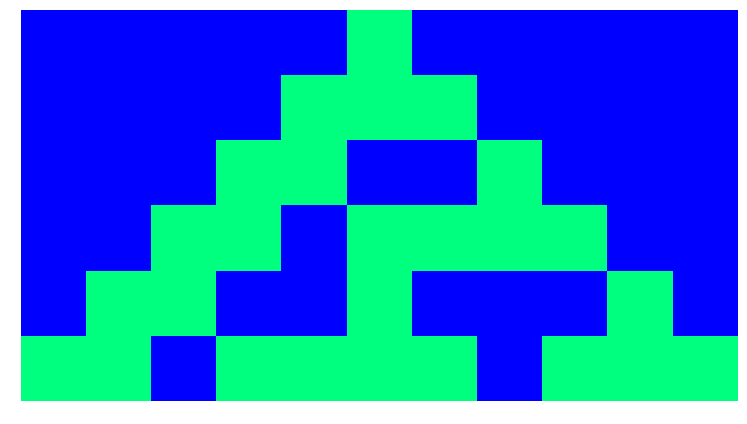

In [9]:
from IPython.display import clear_output
from IPython.display import display
from time import sleep

import gc

rule = {
    (0,0,0): 0, 
    (0,0,1): 1,
    (0,1,0): 1,
    (0,1,1): 1,
    (1,0,0): 1,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 0,
}

length = 11
initial_state = zeros(length, dtype=int)
initial_state[length//2] = 1

history = zeros((length//2 + 1, length), dtype=int)

for i in range(length//2 + 1):
    if i == 0:
        history[0] = initial_state
    else:
        pre_init = [history[i-1][-1]]
        post_end = [history[i-1][0]]

        circular_state = pre_init + list(history[i-1]) + post_end
        neighborhoods = array(list(circular_state[i-1:i+2] for i in range(1, len(circular_state) - 1)))

        history[i] = array(list([rule[tuple(neighborhood)] for neighborhood in neighborhoods]))
    
    fig = figure(figsize=[12, 6], frameon=True)
    axs = fig.add_subplot('111')
    axs.imshow(history, cmap='winter')
    axs.axis('off')
    draw()
    tight_layout()
    display(fig)
    clear_output(wait=True)
    fig.clf()
    close()
    gc.collect()
    
    sleep(0.15)

<h5>2.2.2.3. Una implementación más compleja</h5>

In [10]:
from numpy import array
from numpy import where
from numpy import zeros
from numpy import ones
from collections import Iterable


class State(object):
    FINITE='f'
    PERIODIC='p'
    
    __grid = None
    __stype = None
    
    def __init__(self, s, stype=PERIODIC):
        if stype == self.PERIODIC or stype == self.FINITE:
            self.__stype = stype
        else:
            raise(ValueError('Invalid value for ntype.'))
            
        if isinstance(s, int):
            self.__grid = zeros(s)
            
        if isinstance(s, Iterable):
            self.__grid = array(list(s))
    
    def __getitem__(self, key):
        return self.__grid[key]

    def __setitem__(self, key, value):
        self.__grid[key] = value
        
    def __len__(self):
        return len(self.__grid)
        
    def __str__(self):
        return str(self.__grid)
    
    def __repr__(self):
        return repr(self.__grid)

    def __eq__(self, other):
        return self.grid.__eq__(other)
    
    @property
    def grid(self):
        return self.__grid
    
    @property
    def stype(self):
        return self.__stype
    
    @property
    def neighborhoods(self):        
        begin = [self.grid[-1] if self.__stype == self.PERIODIC else 0]
        end = [self.grid[0] if self.__stype == self.PERIODIC else 0]
        fake_grid = tuple(begin + list(self.grid) + end)
        
        return list(fake_grid[i-1:i+2] for i in range(1, len(self.grid) + 1))

In [11]:
from numpy import array

class Rule(object):
    __f = None
    
    def __init__(self, f=lambda x: x[1]):
        if not isinstance(f, dict) and not callable(f):
            raise(TypeError('Rule argument must be callable or dict instance'))
        
        self.__f = f
    
    def __call__(self, cell, *args, **kwargs):
        if callable(self.__f):
            return self.__f(cell, *args, **kwargs)
        else:
            return self.__f[cell]

In [12]:
class CellularAutomaton(object):
    """
    Cellular Atomaton class
    """
    __seed = None
    __history = None
    __rule = None
    __stype = None
    
    def __init__(self, seed=None, rule=None):
        # Check for seed assignment
        if isinstance(seed, State):
            self.__stype = seed.stype
            self.__seed = array(seed.grid, dtype=int)
            self.__history = [array(self.__seed, dtype=int)]
            
        elif seed is None:
            self.__seed = None
            self.history = None
        else:
            raise(TypeError("Argument 'seed' must be a State instance"))
        
        # Check for rule assignment
        if isinstance(rule, Rule):
            self.__rule = rule
        elif rule is None:
            self.__rule = None
        else:
            raise(TypeError("Argument 'rule' must be a Rule instance"))
    

    def evolve(self, steps=1):
        if steps < 1:
            raise(ValueError("Evolution steps must be greater than 0"))
        
        if self.__rule is None:
            raise(ValueError("Evolution rule is not defined"))
        
        if self.__seed is None:
            raise(ValueError("Initial state doesn't exists"))
            
        for i in range(len(self.history), steps):
            
            self.__history.append(
                array(
                    [self.rule(neighborhood) for neighborhood in State(self.history[-1], self.stype).neighborhoods]
                )
            )
   
    # Properties
    @property
    def rule(self):
        return self.__rule
    
    @rule.setter
    def rule(self, value):
        if isinstance(value, Rule):
            self.__rule = rule
        else:
            raise TypeError("Argument 'rule' must be a Rule instance")
    
    @property
    def seed(self):
        return self._seed
    
    @seed.setter
    def seed(self, value):
        if isinstance(value, State):
            self.__stype = value.stype
            self.__seed = array(value.grid)
            self.__history = [array(self.__seed)]
        else:
            raise TypeError("Argument 'rule' must be a State instance")
    
    @property
    def stype(self):
        return self.__stype

    @property
    def history(self):
        return array(self.__history)

<h5>2.2.2.3. Explorando otras reglas</h5>

<h6>La relga 30</h6>

In [13]:
Rule30 = Rule({
    (0,0,0): 0, 
    (0,0,1): 1,
    (0,1,0): 1,
    (0,1,1): 1,
    (1,0,0): 1,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 0,
})

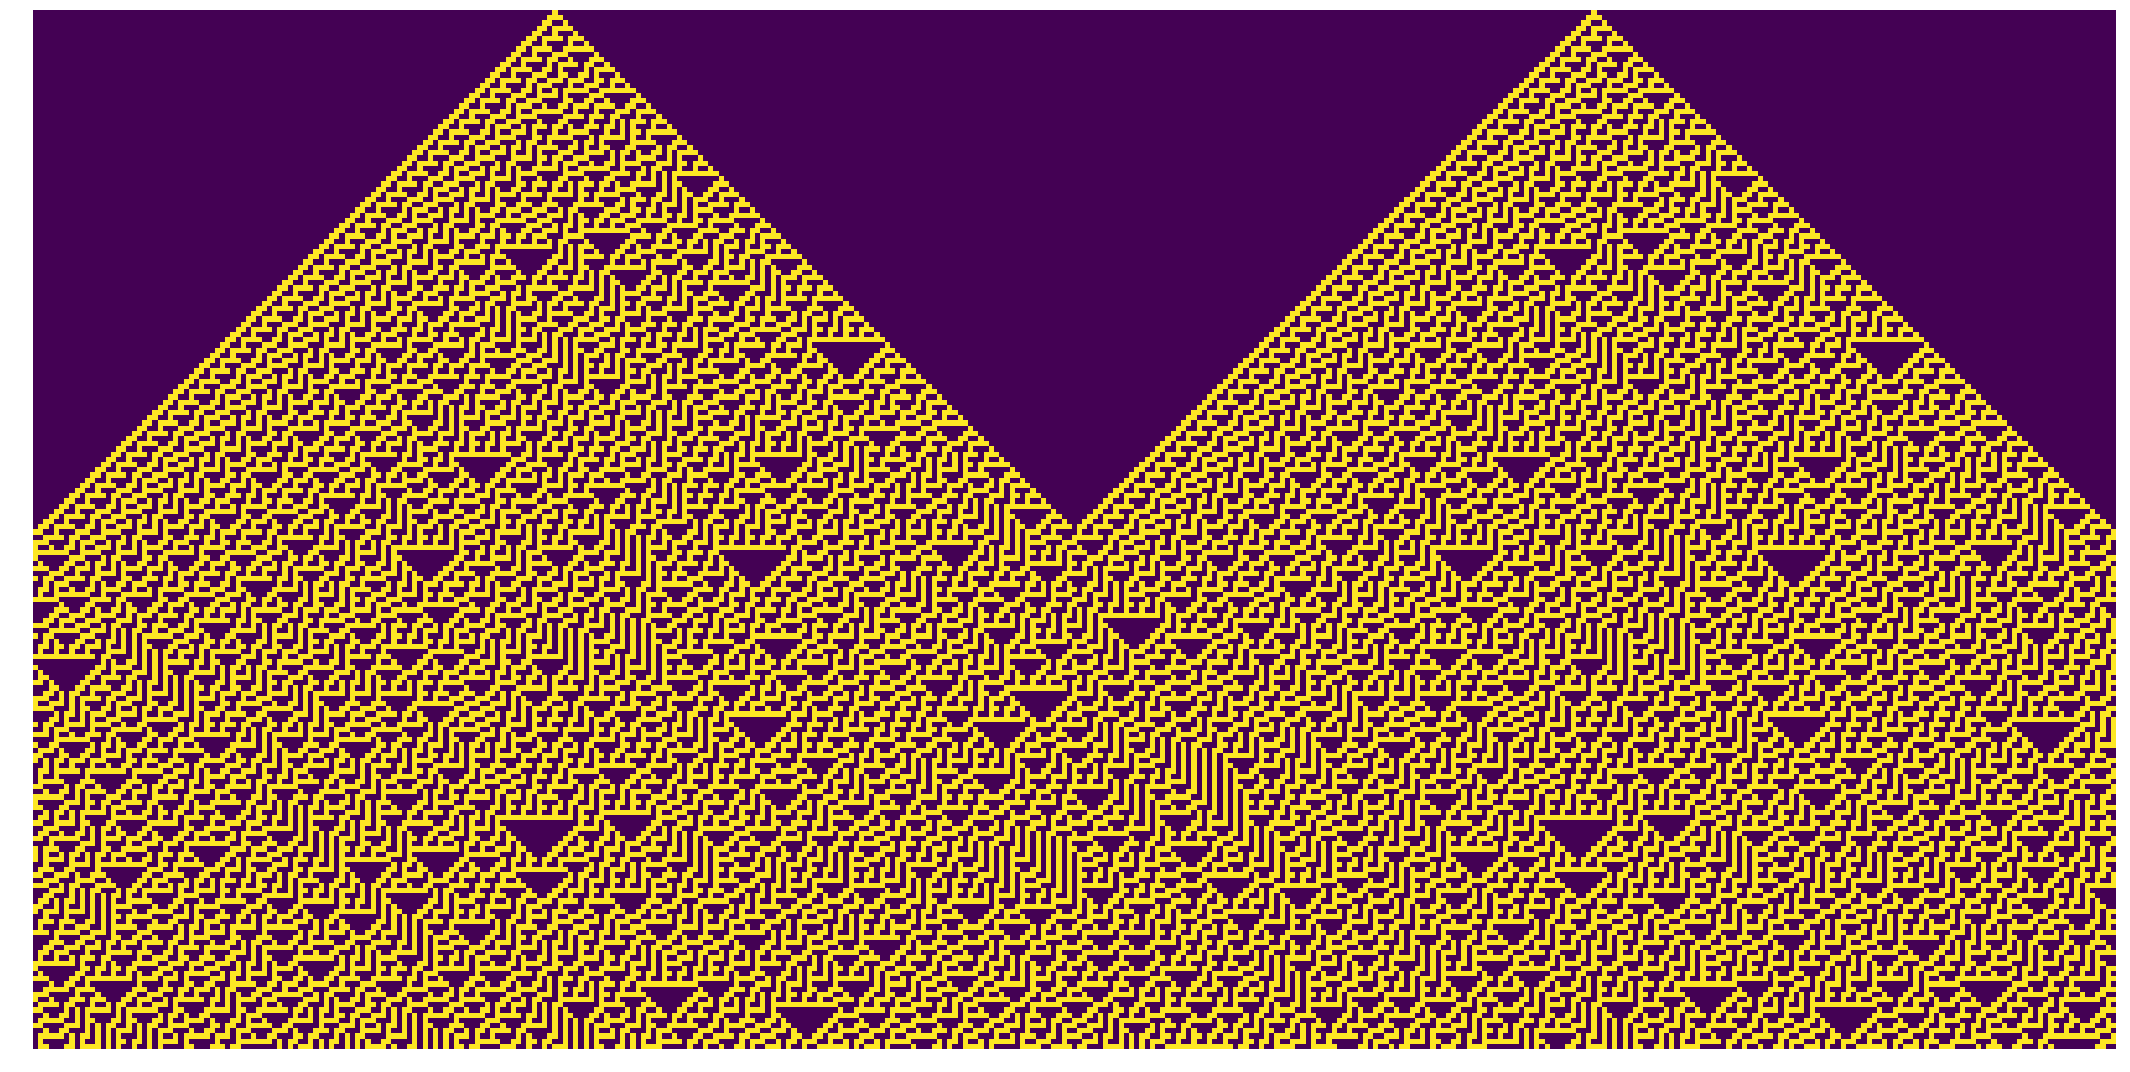

In [14]:
size = 401
center = size//2

seed = State(size)
seed[size//4] = 1
seed[3*size//4] = 1
ca = CellularAutomaton(seed, Rule30);
ca.evolve(size//2)

fig = figure(figsize=(30, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
draw()
tight_layout()
show()

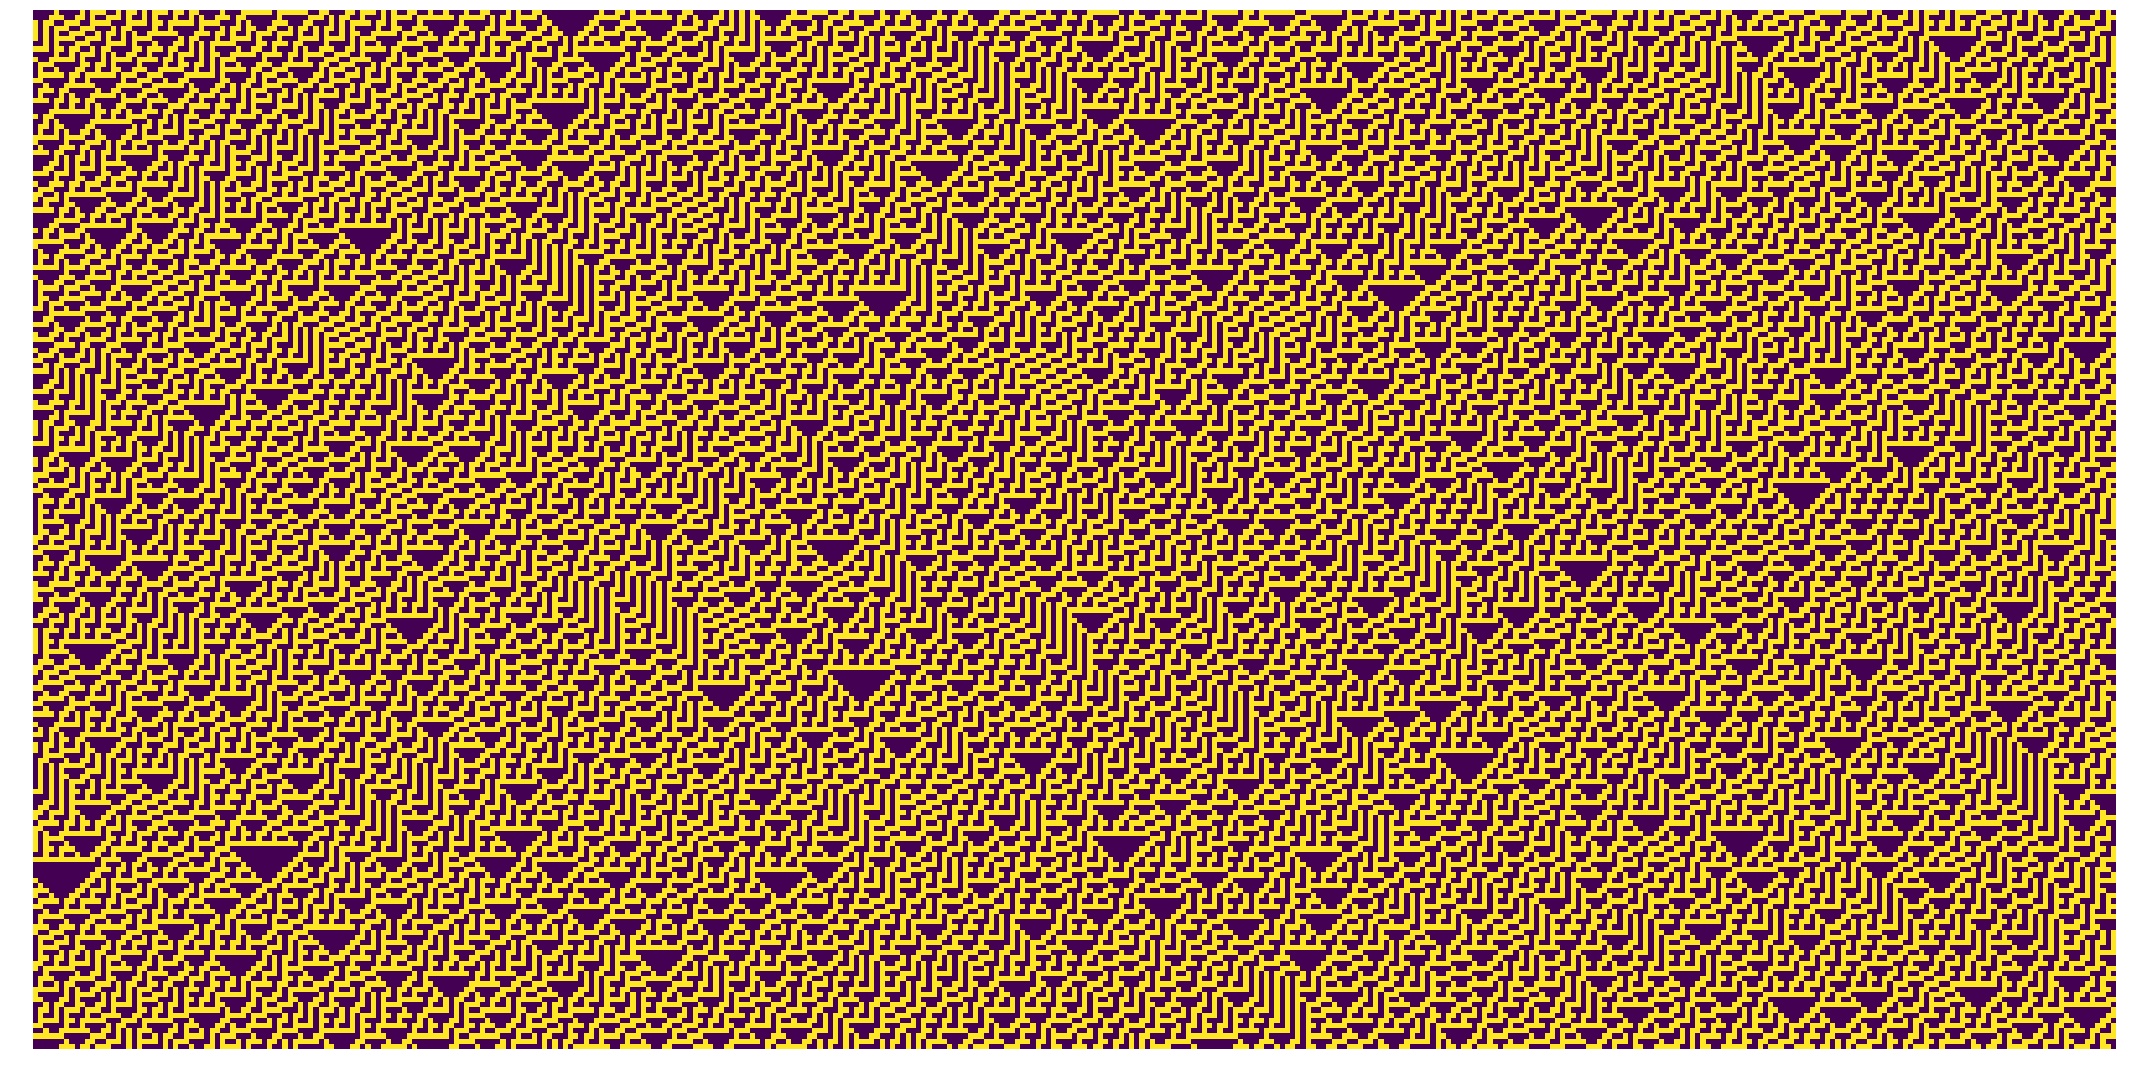

In [15]:
size = 401
center = size//2

seed = State([round(x) for x in random(size)])
ca = CellularAutomaton(seed, Rule30);
ca.evolve(size//2)

fig = figure(figsize=(30, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
draw()
tight_layout()
show()

<h6>La regla 110</h6>

In [16]:
Rule110 = Rule({
    (1,1,1): 0,
    (1,1,0): 1,
    (1,0,1): 1,
    (1,0,0): 0,
    (0,1,1): 1,
    (0,1,0): 1,
    (0,0,1): 1,
    (0,0,0): 0, 
})

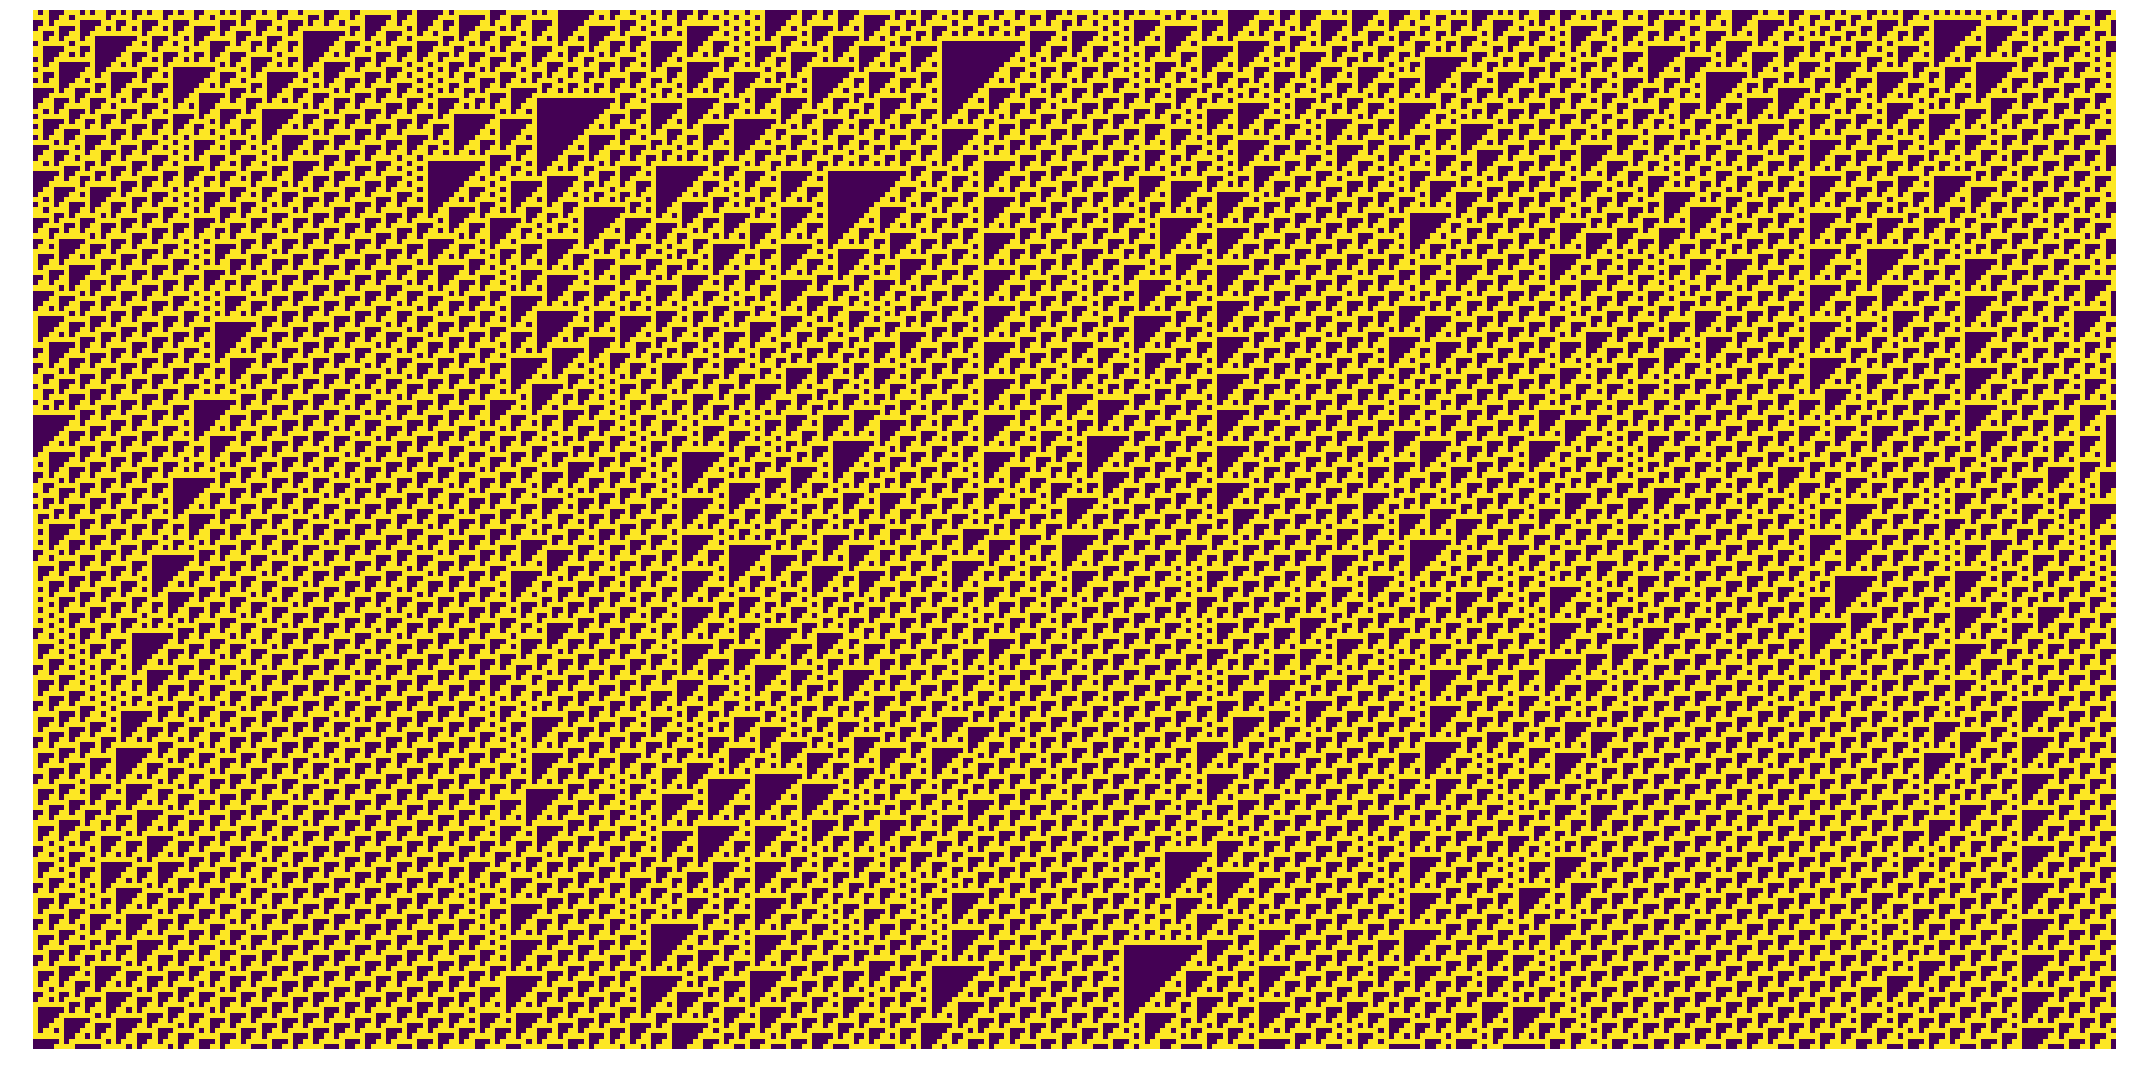

In [17]:
size = 401
center = size//2

seed = State([round(x) for x in random(size)])
ca = CellularAutomaton(seed, Rule110);
ca.evolve(size//2)

fig = figure(figsize=(30, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
draw()
tight_layout()
show()

<h6>Otras relgas</h6>

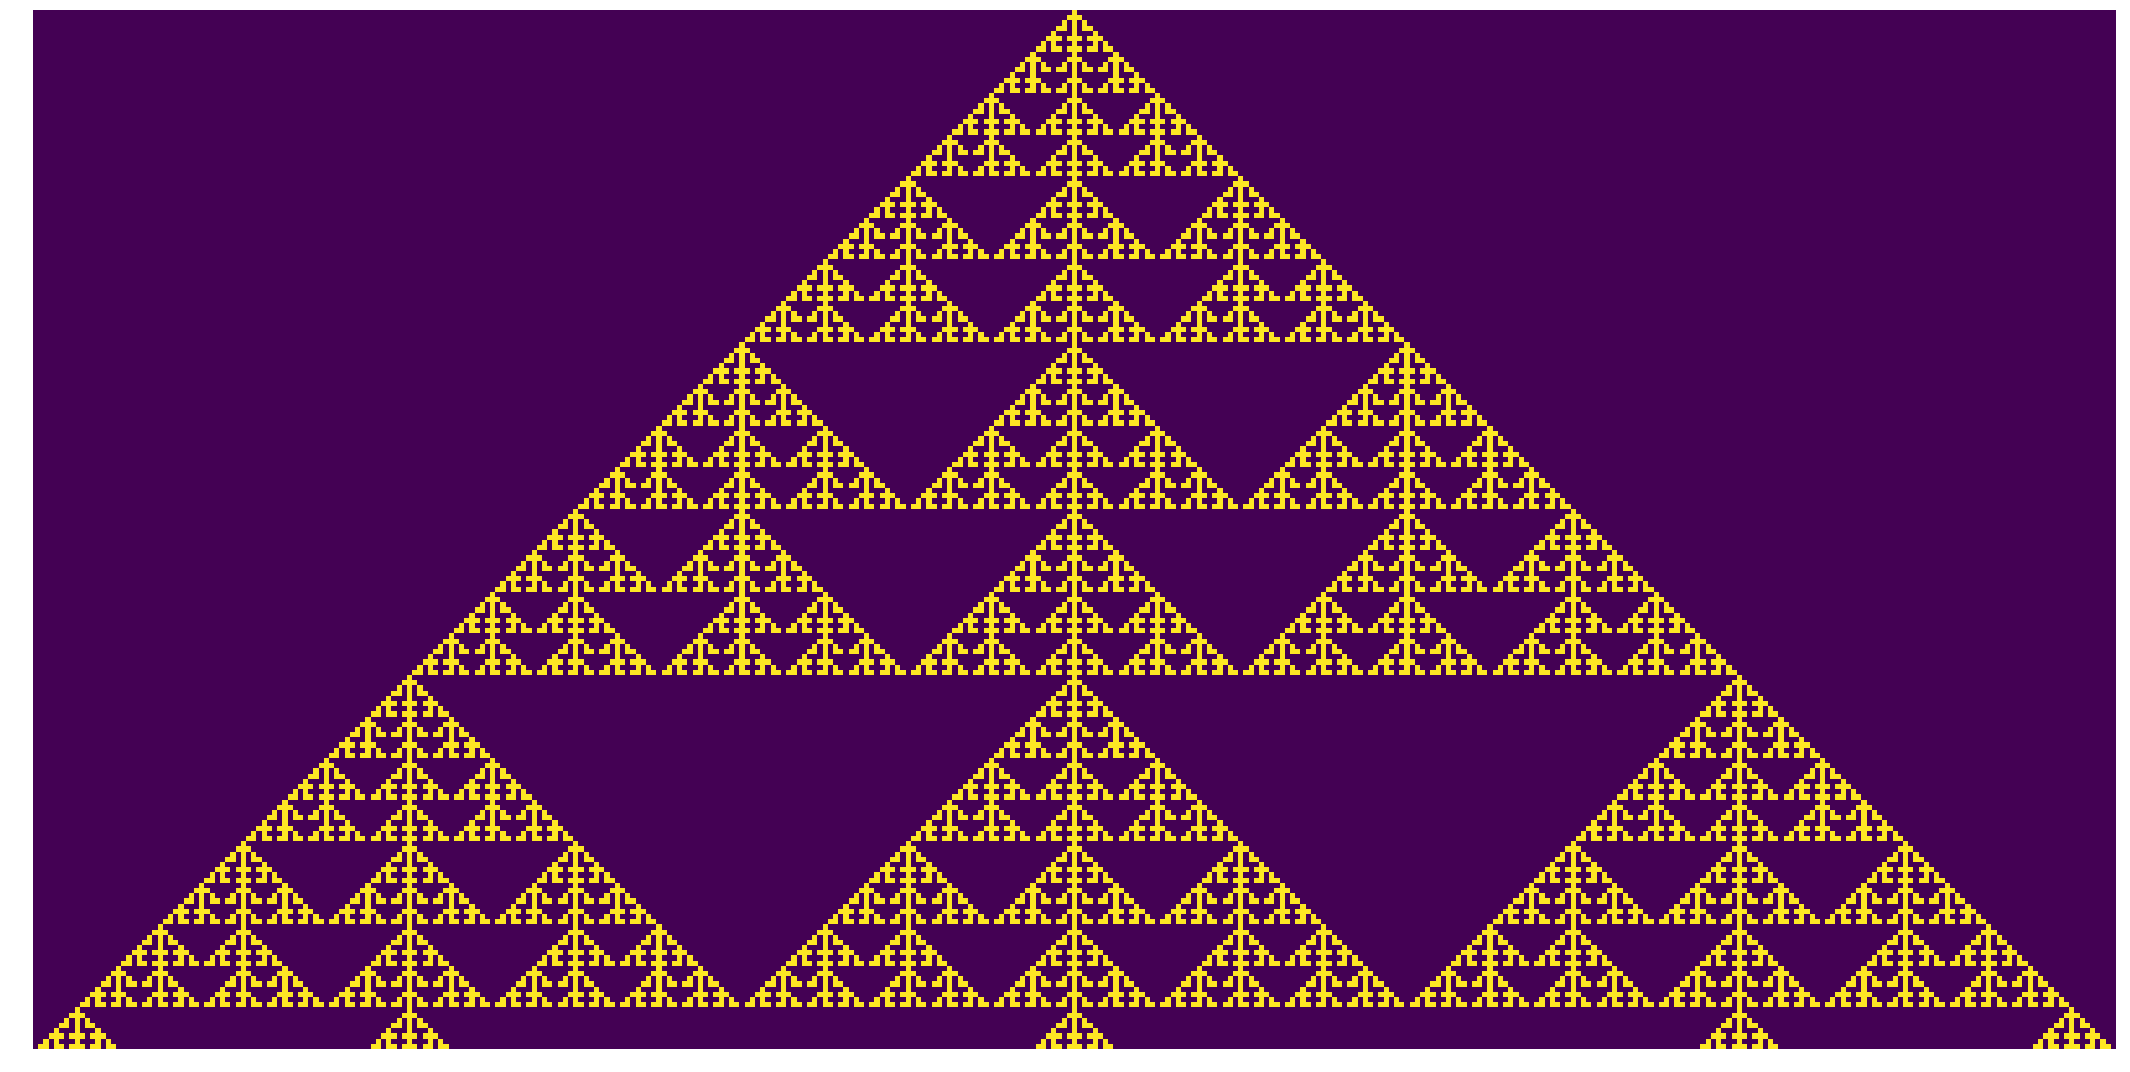

In [18]:
def custom_rule(cell):
    return sum(cell) % 2

CustomRule = Rule(custom_rule)
    
size = 401
center = size//2

# seed = State([round(x) for x in random(size)])
seed = State(size, stype=State.FINITE)
seed[center] = 1

ca = CellularAutomaton(seed, CustomRule);
ca.evolve(size//2)

fig = figure(figsize=(30, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
draw()
tight_layout()
show()

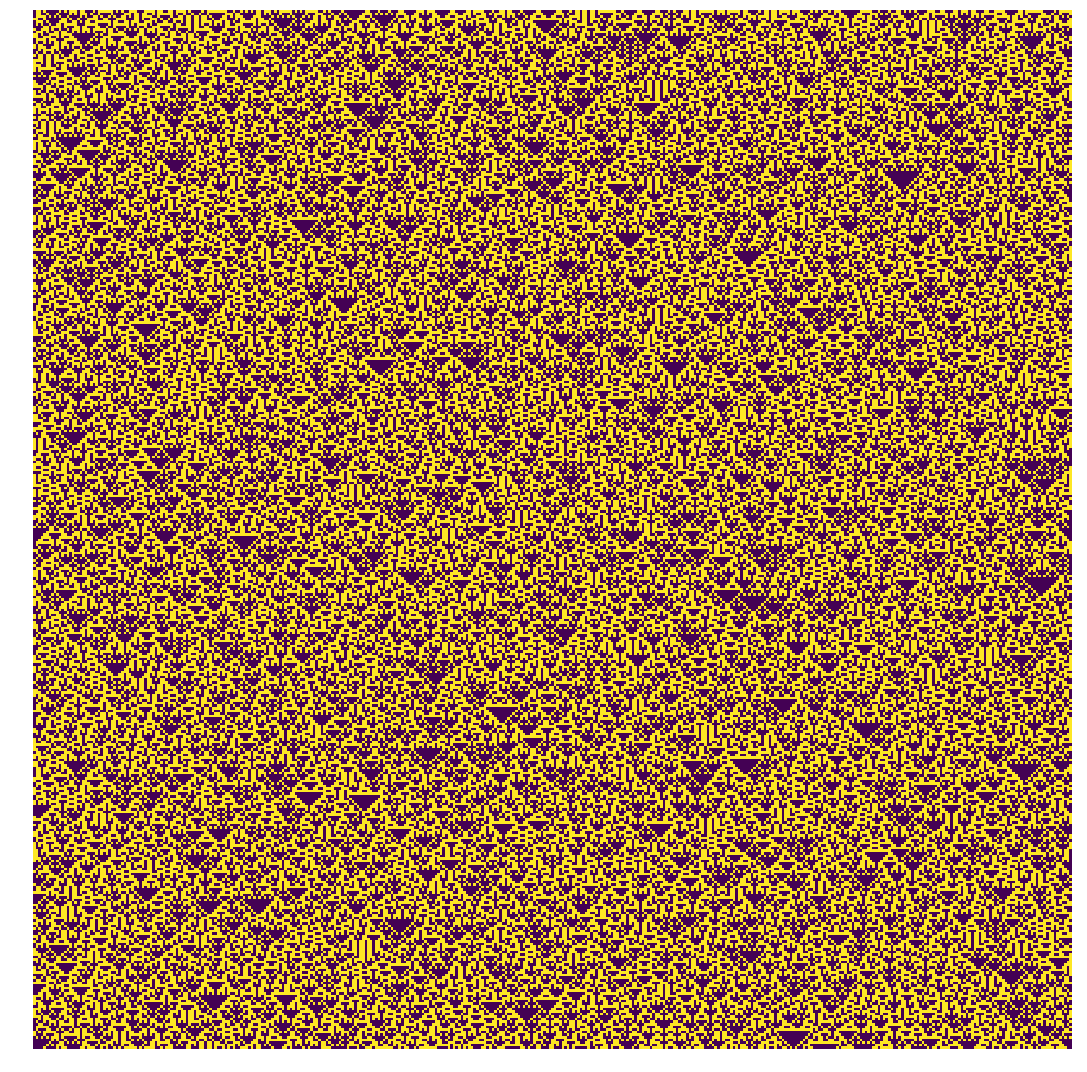

In [19]:
def custom_rule(cell):
    return cell[0] != cell[-1]

CustomRule = Rule(custom_rule)
    
size = 401
center = size//2

seed = State([round(x) for x in random(size)])
# seed = State(size, stype=State.FINITE)
# seed[center] = 1

ca = CellularAutomaton(seed, CustomRule);
ca.evolve(size)

fig = figure(figsize=(30, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
draw()
tight_layout()
show()

<h2>3. Etsuko Yakushimaru y el Juego de la Vida de Conway</h2>

In [20]:
from IPython.display import clear_output
from IPython.display import display
from time import sleep

import gc


def GameOfLife(state, steps=20, step_time=0.01, size=[6, 6]):
    def NextState(state):
        neighborhood_count = sum(
            roll(
                roll(state, i, 0), 
                j,
                1
            ) for i in (-1, 0, 1) for j in (-1, 0, 1) if (i != 0 or j != 0)
        )

        return (neighborhood_count == 3) | (state & (neighborhood_count == 2))        

    for i in range(steps):
        if i > 0:
            new_state = NextState(state)
            state = new_state

        fig = figure(figsize=size, frameon=True)
        axs = fig.add_subplot('111')
        axs.imshow(state, cmap='winter')
        # axs.axis('off')

        axs.set_xticks([])
        axs.set_yticks([])

        axs.set_facecolor('#fafafa')
        axs.spines['top'].set_linewidth(1)
        axs.spines['top'].set_color('#212121')
        axs.spines['right'].set_linewidth(0)
        axs.spines['right'].set_color('#fafafa')
        axs.spines['bottom'].set_linewidth(0)
        axs.spines['bottom'].set_color('#fafafa')
        axs.spines['left'].set_linewidth(0)
        axs.spines['left'].set_color('#fafafa')

        axs.set_title(
            "State: {0}".format(i+1),
            fontproperties=font_title,
            horizontalalignment='left',
            verticalalignment='bottom',
            x=0,
            y=1,
        )
        
        draw()
        tight_layout()
        display(fig)
        clear_output(wait=True)
        fig.clf()
        close()
        gc.collect()

        sleep(step_time)

        if i == 0:
            sleep(1.35)

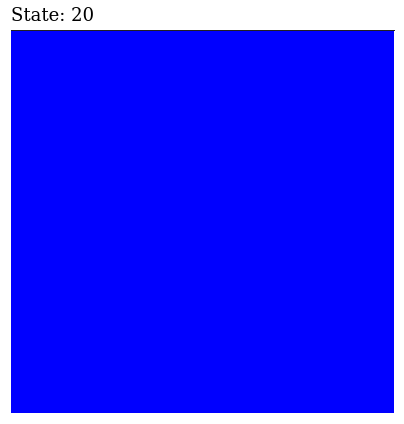

In [21]:
state = array([array([round(x) for x in row], dtype=int) for row in random((10, 10))], dtype=int)
GameOfLife(state)

<h3>3.1. Algunos estados interesantes en el Juego de la vida</h3>

<h4>3.1.1. Estados estacionario</h4>

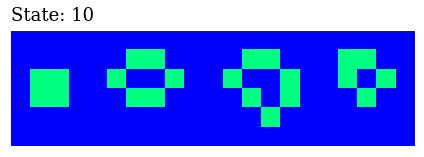

In [22]:
state = zeros((6, 21), dtype=int)

state[2:4, 1:3] = 1

state[1:4, 5:9] = [[0, 1, 1, 0],
                   [1, 0, 0, 1],
                   [0, 1, 1, 0]]

state[1:5, 11:15] = [[0, 1, 1, 0],
                     [1, 0, 0, 1],
                     [0, 1, 0, 1],
                     [0, 0, 1, 0]]

state[1:4, 17:20] = [[1, 1, 0],
                     [1, 0, 1],
                     [0, 1, 0]]

GameOfLife(state, 10)

<h3>3.1.2. Osciladores simples</h3>

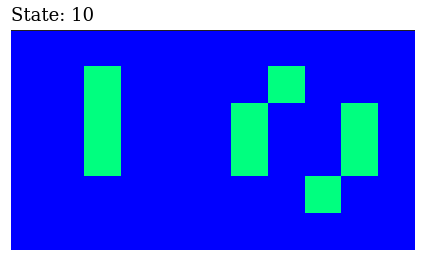

In [23]:
blinker = [1, 1, 1]
toad = [[1, 1, 1, 0],
        [0, 1, 1, 1]]

state = np.zeros((6, 11), dtype=int)

state[2, 1:4] = blinker

state[2:4, 6:10] = toad

GameOfLife(state, 10)

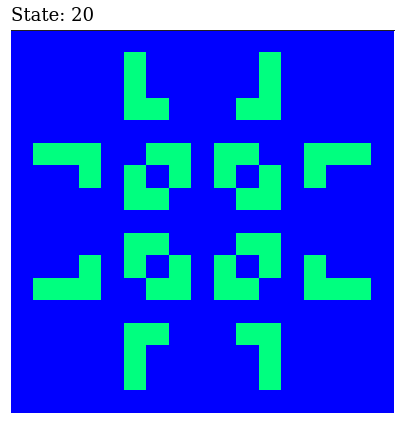

In [24]:
state = zeros((17, 17), dtype=int)
state[2, 4:7] = 1
state[4:7, 7] = 1
state += state.transpose()
state += state[:, ::-1]
state += state[::-1, :]
GameOfLife(state)

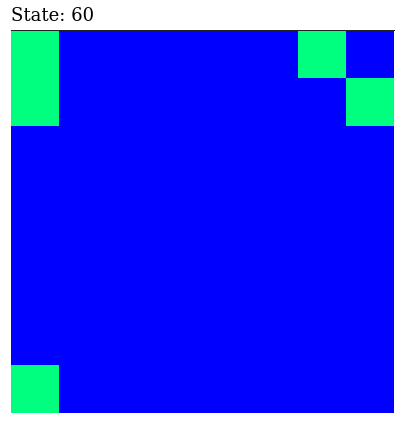

In [25]:
glider = [[1, 0, 0],
          [0, 1, 1],
          [1, 1, 0]]

state = np.zeros((8, 8), dtype=int)

state[:3, :3] = glider

GameOfLife(state, 60)

<h3>3.1.3. Crecimiento ilimitado</h3>

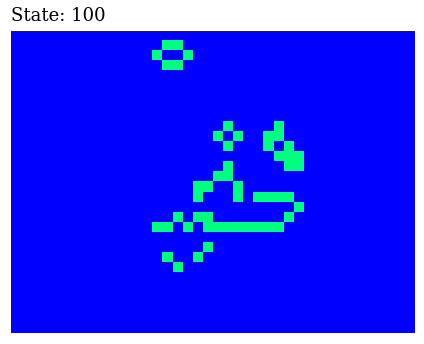

In [26]:
unbounded = [[1, 1, 1, 0, 1],
             [1, 0, 0, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 0, 1]]

state = np.zeros((30, 40), dtype=int)
state[15:20, 18:23] = unbounded

GameOfLife(state, 100, 0.05)

<h3>3.1.4. Otros patrones</h3>

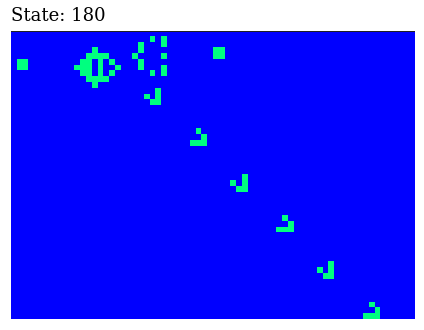

In [27]:
glider_gun = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
              [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
              [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]


state = np.zeros((50, 70), dtype=int)
state[1:10,1:37] = glider_gun

GameOfLife(state, 180, 0.005)

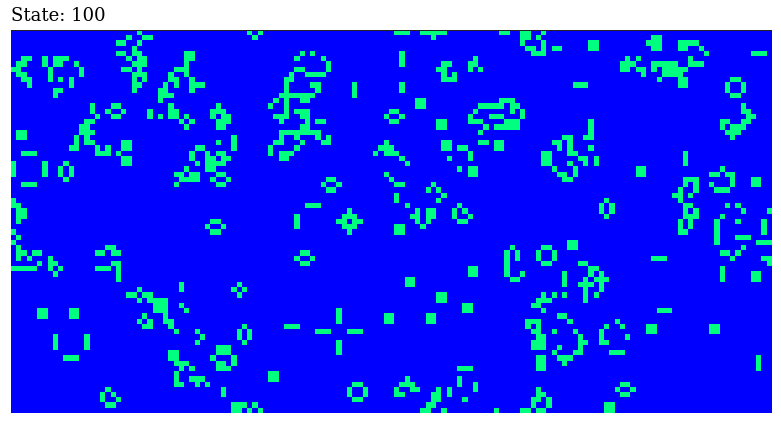

In [28]:
A = [
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
]

C = [
    [0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1],
]

G = [
    [0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [0, 1, 1, 1, 1],
]

T = [
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
]

ADN = {
    0: A,
    1: C,
    2: G,
    3: T,
}

x = 24
y = 12
f = 6
k = 3

state = zeros((y*f+1, x*f+1), dtype=int)

for i in range(1,x*f+1,f):
    for j in range(1,y*f+1,f):
        r = round(k*random())
        state[j:j+f-1, i:i+f-1] = ADN[r]

GameOfLife(state, steps=100, step_time=0.001, size=[15, 6])

<h6><b>Note: </b>To make theme available when the notebook becomes visualized on nbviewer</h6>

In [29]:
from IPython.core.display import HTML  
from IPython.display import display_html

styles = "<style>{0:}</style>".format(open('./resources/custom.css','r').read())
display_html(HTML(styles))